In [124]:

from __future__ import print_function
from statsmodels.compat import lzip
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Duncan's Prestige Dataset
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data


prestige.head()

prestige_model = ols('prestige ~ income + education', data = prestige).fit()

print(prestige_model.summary())


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           8.65e-17
Time:                        10:06:58   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

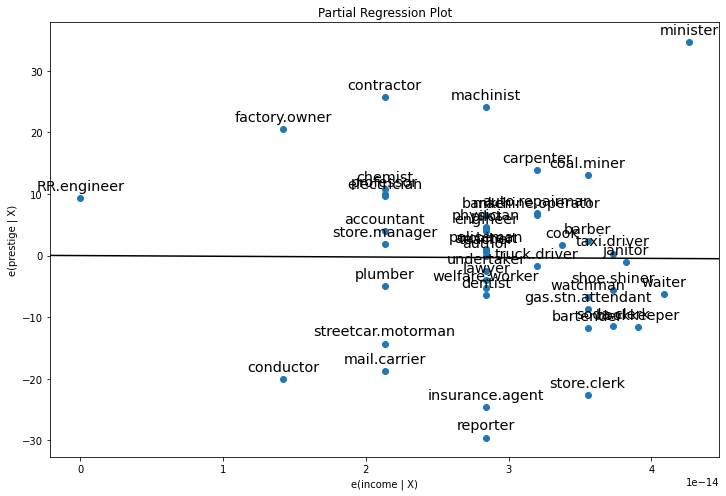

In [118]:

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.plot_partregress('prestige', 'income', ['income', 'education'], data = prestige, ax=ax)


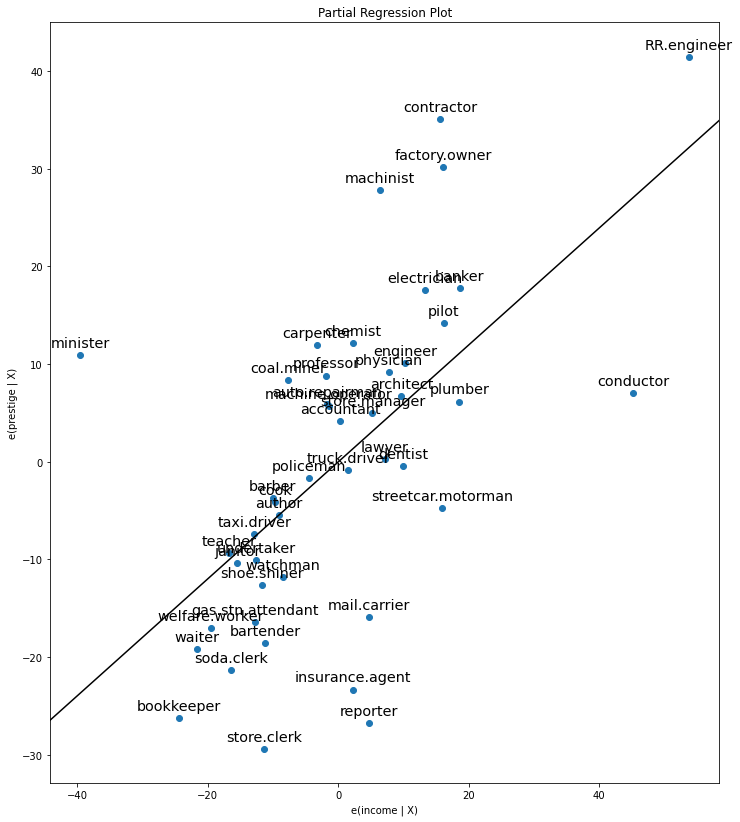

In [119]:

fig, ax = plt.subplots(figsize=(12,14))
fig = sm.graphics.plot_partregress('prestige', 'income', ['education'], data = prestige, ax = ax)


In [120]:

subset = ~ prestige.index.isin(['conductor', 'PR.engineer', 'minister'])
prestige_model2 = ols('prestige ~ income + education', data = prestige, subset = subset).fit()
print(prestige_model2.summary())


                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     141.3
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           7.42e-19
Time:                        10:02:44   Log-Likelihood:                -164.16
No. Observations:                  43   AIC:                             334.3
Df Residuals:                      40   BIC:                             339.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4090      3.653     -1.755      0.0